In [1]:
import pickle 

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

%matplotlib notebook

In [2]:
with open("trajectory.pkl","rb") as handle:
    trajectory = pickle.load(handle)

with open("hamiltonian.pkl","rb") as handle:
    hamiltonian = pickle.load(handle)

<IPython.core.display.Javascript object>


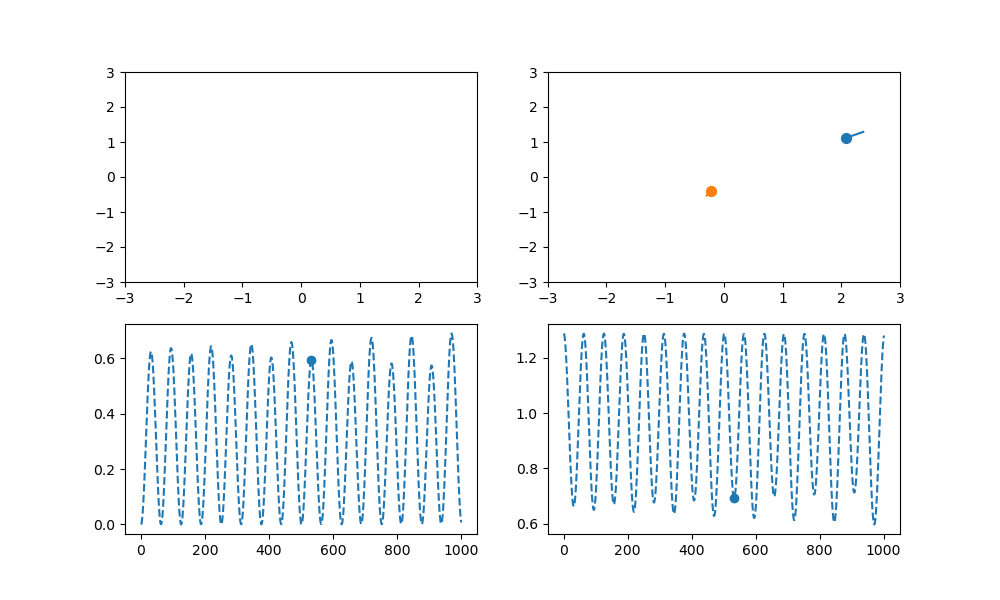

In [6]:
num_points = len(trajectory["r"][0])

#a = np.random.rand(2000, 3)*10
t = np.arange(len(trajectory))

def update_graph(num):
    plot_hem.set_offsets([num, hamiltonian["em"][num]])
    plot_hmat.set_offsets([num, hamiltonian["mat"][num]])
    for i in range(num_points):
        data = list(np.real(trajectory["r"][num][i]))
        data_v = list(np.real(trajectory["v"][num][i]))
        
        scat_xy[i].set_offsets([data[0], data[1]])
        scat_xz[i].set_offsets([data[0], data[2]])
        
        plot_xy[i].set_xdata(
            [data[0],data[0]+data_v[0]])
        plot_xy[i].set_ydata(
            [data[1],data[1]+data_v[1]])
        plot_xz[i].set_xdata(
            [data[0],data[0]+data_v[0]])
        plot_xz[i].set_ydata(
            [data[2],data[2]+data_v[2]])

fig, ax = plt.subplots(2, 2,figsize=(10,6))

scat_xy = []
scat_xz = []
plot_xy = []
plot_xz = []

for i in range(num_points):
    data = list(np.real(trajectory["r"][0][i]))
    scat_xy.append(
        ax[0][0].scatter(data[0], data[1], s = 50))
    scat_xz.append(
        ax[0][1].scatter(data[0], data[2], s = 50))
    
    data_v = list(np.real(trajectory["v"][0][i]))
    plot_xy.append(
        ax[0][0].plot(
            (data[0],data[0]+data_v[0]), (data[1],data[1]+data_v[1])
    )[0])
    plot_xz.append(
        ax[0][1].plot(
            (data[0],data[0]+data_v[0]), (data[2],data[2]+data_v[2])
    )[0])

ax[1][0].plot(
    np.arange(len(hamiltonian["em"])), 
    hamiltonian["em"], linestyle = "--"
)
plot_hem = ax[1][0].scatter(
    [0], hamiltonian["em"][0])

ax[1][1].plot(
    np.arange(len(hamiltonian["mat"])), 
    hamiltonian["mat"], linestyle = "--"
)
plot_hmat = ax[1][1].scatter(
    [0], hamiltonian["mat"][0])

ax[0][0].set_xlim(-3,3)
ax[0][0].set_ylim(-3,3)
ax[0][1].set_xlim(-3,3)
ax[0][1].set_ylim(-3,3)

ani = animation.FuncAnimation(fig, update_graph, len(trajectory["r"]), 
                               interval=10, blit=False)
fig.show()

#ani.save(filename="trajectory.gif", writer="pillow")

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation
import pandas as pd


a = np.random.rand(2000, 3)*10
t = np.array([np.ones(100)*i for i in range(20)]).flatten()
df = pd.DataFrame({"time": t ,"x" : a[:,0], "y" : a[:,1], "z" : a[:,2]})

def update_graph(num):
    data=df[df['time']==num]
    graph._offsets3d = (data.x, data.y, data.z)
    title.set_text('3D Test, time={}'.format(num))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('3D Test')

data=df[df['time']==0]
graph = ax.scatter(data.x, data.y, data.z)

ani = matplotlib.animation.FuncAnimation(fig, update_graph, frames=40, 
                               interval=40,blit=False)

plt.show()

In [ ]:
df

In [ ]:
data=df[df['time']==2]
data

In [ ]:
list(np.real(trajectory[1][0]))